# Home Kredit Default Risk
####    By Arif Putera Wijaya
    
    Task : menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit, ntuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses.menggunakan setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

#### Load Dataset

In [2]:
application_train = pd.read_csv('home-credit-default-risk/application_train.csv')


#### Data Heading

In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

###### application_train.csv
    Merupakan Main Data yang berisi data statis untuk semua pengajuan peminjaman. Satu baris mewakili satu pinjaman dalam sampel data kita.
    

#### Explore main data (application_train.csv)

In [7]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [8]:
application_train.shape

(307511, 122)

In [9]:
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

#### Tabel Penting :

    SK_ID_CURR: Nomor identifikasi unik untuk setiap aplikasi pinjaman.

    TARGET: Variabel target, di mana 1 mungkin berarti pelanggan mengalami masalah pembayaran (default), dan 0 berarti tidak.

    NAME_CONTRACT_TYPE: Jenis kontrak pinjaman, bisa berupa "Cash loans" atau "Revolving loans".

    CODE_GENDER: Jenis kelamin pelanggan (M: Male, F: Female).

    FLAG_OWN_CAR: Menunjukkan apakah pelanggan memiliki mobil (Y: Yes, N: No).

    FLAG_OWN_REALTY: Menunjukkan apakah pelanggan memiliki properti (rumah atau real estate) (Y: Yes, N: No).

    CNT_CHILDREN: Jumlah anak yang menjadi tanggungan pelanggan.

    AMT_INCOME_TOTAL: Total pendapatan pelanggan.

    AMT_CREDIT: Jumlah kredit yang diminta oleh pelanggan.

    AMT_ANNUITY: Jumlah angsuran bulanan yang harus dibayarkan oleh pelanggan.

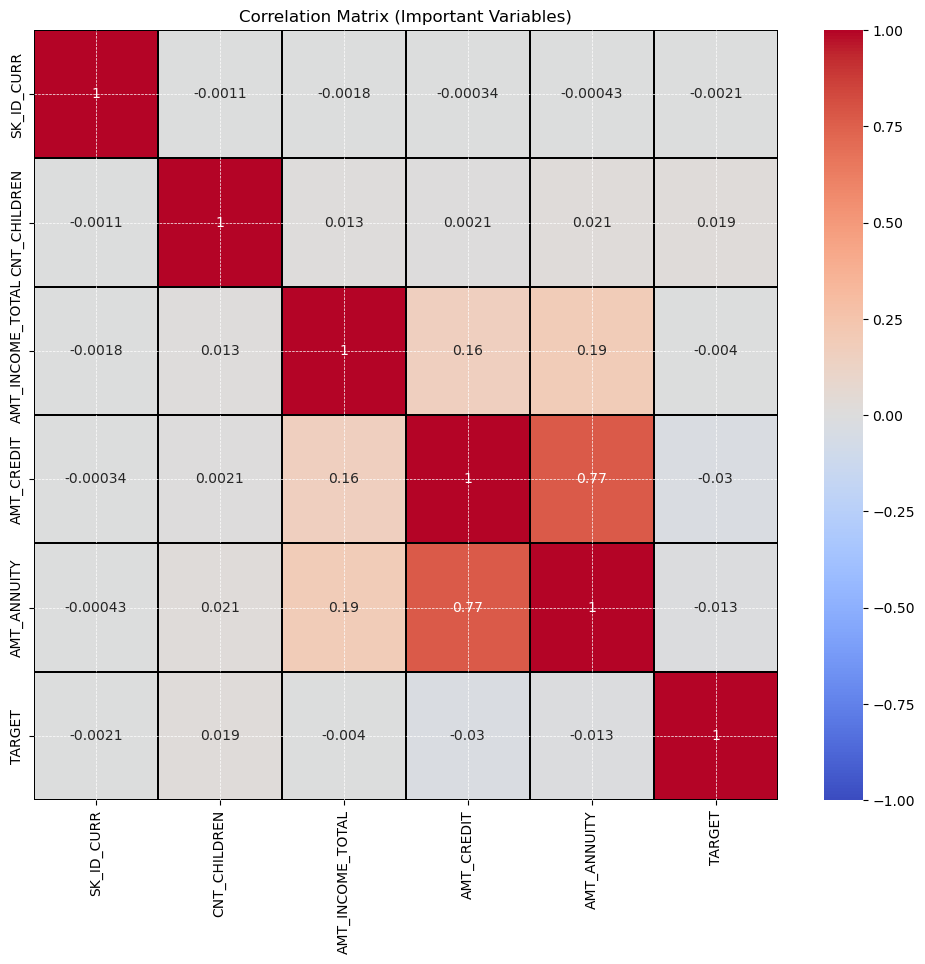

In [10]:
important_variables = [
    'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'TARGET'
]

correlation_matrix = application_train[important_variables].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.1, linecolor='black')

plt.gca().set_facecolor('#F5F5F5')
plt.grid(color='white', linestyle='--', linewidth=0.5)

plt.title('Correlation Matrix (Important Variables)')
plt.show()


#### Target 
    TARGET merupakan variabel yang melihat apakah client memiliki skor kredit lancar atau tidak

In [11]:
print("Berikut jumlah value dari Target")
print(application_train['TARGET'].value_counts())

print("\n\nDalam percent sebagai berikut")
print(application_train['TARGET'].value_counts(normalize=True) * 100)


Berikut jumlah value dari Target
0    282686
1     24825
Name: TARGET, dtype: int64


Dalam percent sebagai berikut
0    91.927118
1     8.072882
Name: TARGET, dtype: float64


Dilihat dari data diatas, bahwa 
0 : Lancar 
1 : tidak lancar

dimana dari data ini terdapat 8% peminjam yang gagal bayar


In [12]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14))

    sns.set_color_codes("pastel")
    # Tambahkan warna pada barplot
    s = sns.barplot(ax=ax1, x=feature, y="Number of contracts", data=df1, palette='BuGn') 

    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    # Tambahkan anotasi jumlah data pada barplot
    for p in s.patches:
        s.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

    s = sns.barplot(ax=ax2, x=feature, y='TARGET', order=cat_perc[feature], data=cat_perc, palette='OrRd')  

    if label_rotation:
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    # Tambahkan anotasi persentase pada barplot TARGET
    for p in s.patches:
        s.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.ylabel('Percent of target with value 1 / Tidak lancar membayar [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    # Atur warna latar belakang dan grid
    plt.gca().set_facecolor('#F5F5F5')
    plt.grid(color='white', linestyle='--', linewidth=0.5)

    plt.show()


#### Jenis Peminjaman
    Merupakan Bentuk Produk Peminjaman yang ditawarkan Home Kredit

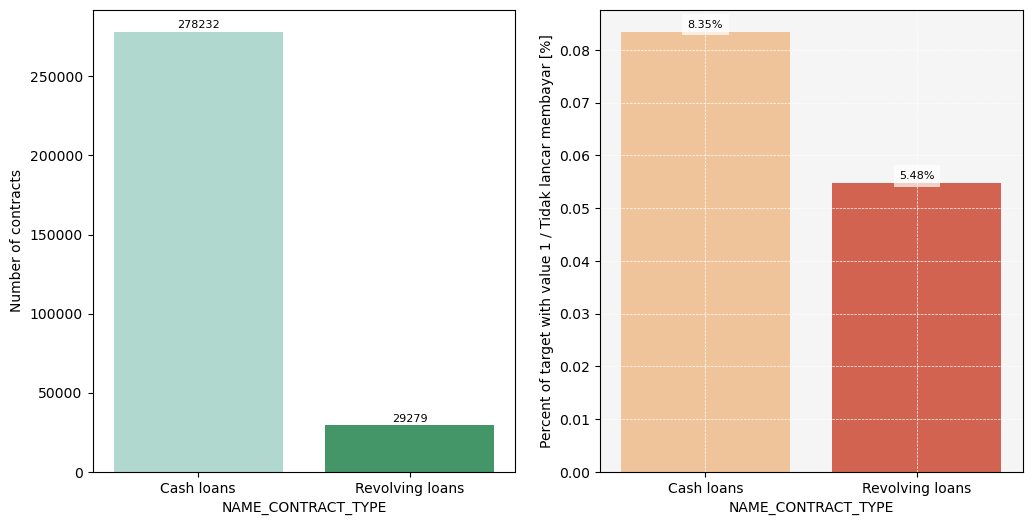

In [13]:
plot_stats('NAME_CONTRACT_TYPE')

    Jenis kontrak pinjaman yang bersifat Revolving loans hanya merupakan sebagian kecil dari total jumlah pinjaman. 
    
    Namun sekaligus, jumlah Revolving loans memiliki tingkat tidak lancar lebih besar, jika dibandingkan dengan frekuensinya. 
    
    Ini mengindikasikan bahwa meskipun jumlah Revolving loans tidak sebanyak jenis pinjaman lainnya, tetapi proporsi dari Revolving loans yang tidak terbayarkan relatif lebih tinggi dibandingkan dengan jenis pinjaman lainnya.

#### Gender Client
    Jenis kelamin pelanggan (M: Male, F: Female).

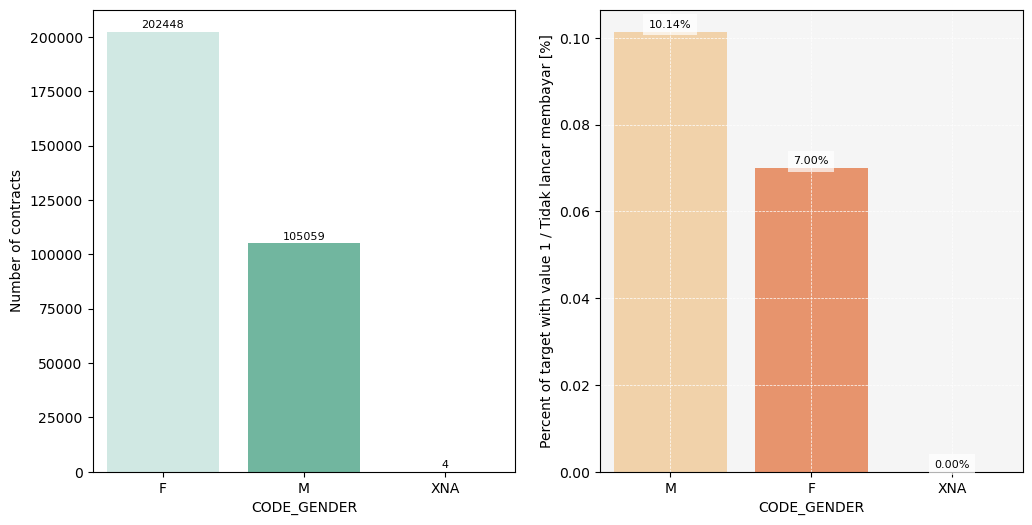

In [14]:
plot_stats('CODE_GENDER')

    Terlihat bahwa sebagian besar pinjaman dilakukan oleh wanita yang mana hampir 2x lebih besar dibandingkan laki-laki, disamping itu persentase gagal bayar/kredit macet lebih banyak dilakukan oleh client wanita jika dilihat dari frekuensinya

#### Jumlah Properti ( Real Estate & Mobil )
    Menunjukkan apakah pelanggan memiliki properti (Y: Yes, N: No).

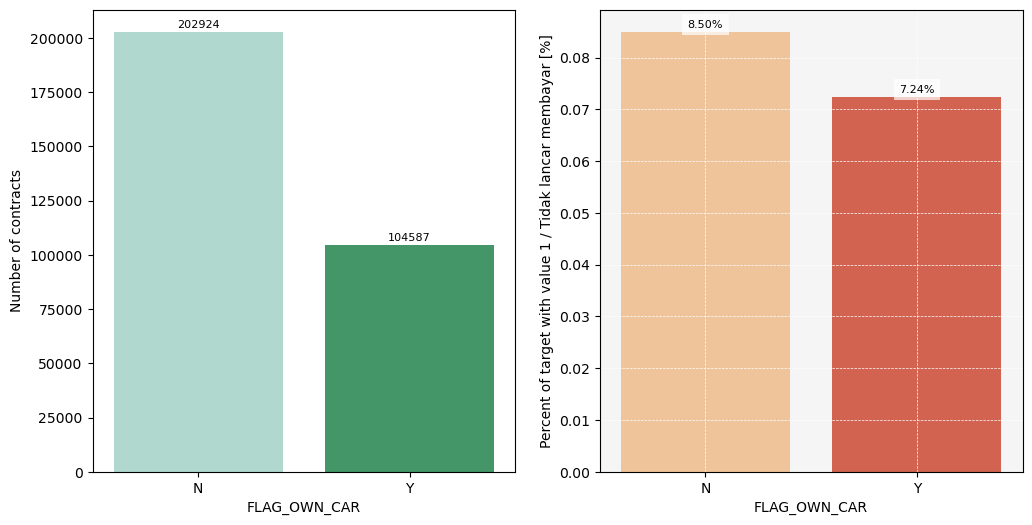

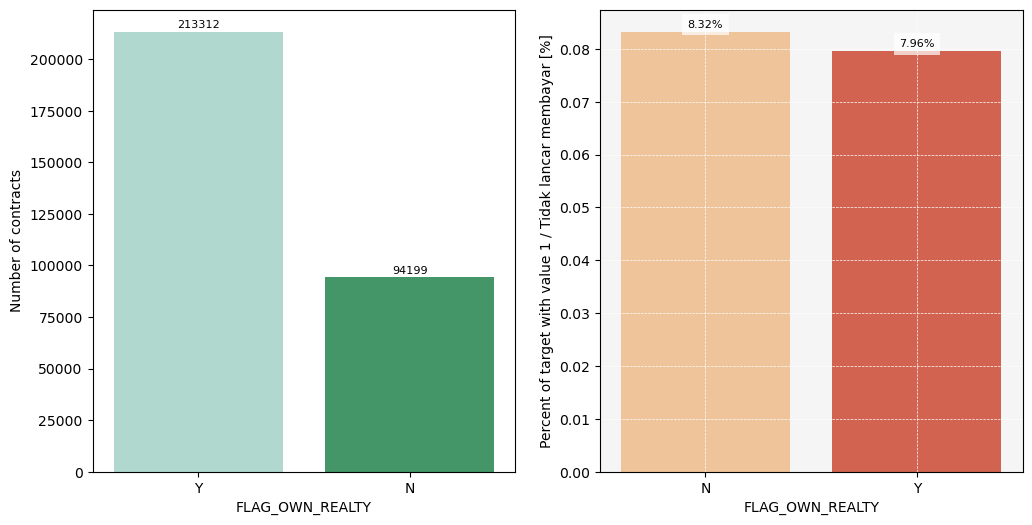

In [15]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

    Terlihat bahwa sebagian besar peminjam tidak memiliki mobil, disamping itu sebagian besar peminjam yang memiliki mobil memiliki skor kredit yang buruk dibandingkan yang tidak memiliki mobil jika dilihat dari frekuensinya
    
    Peminjam yang memiliki properti real lebih dari dua kali lipat dibandingkan peminjam yang tidak memiliki properti. Kedua kategori tersebut (yang memiliki properti real atau tidak memiliki) memiliki tingkat tidak pembayaran sekitar 8%.


#### Jumlah Anak
    Jumlah anak yang menjadi tanggungan peminjam.

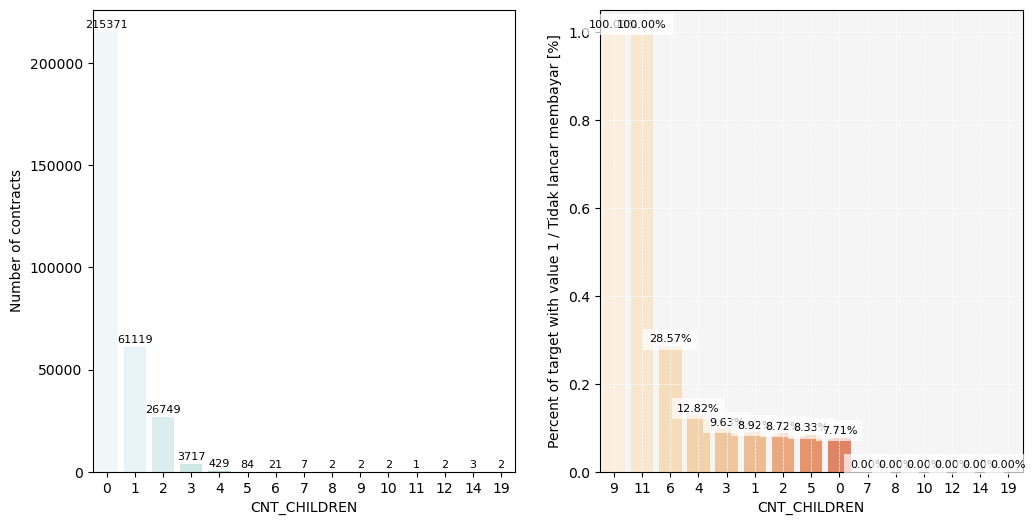

In [16]:
plot_stats('CNT_CHILDREN')

    Sebagian besar klien yang mengajukan pinjaman tidak memiliki anak. Jumlah pinjaman yang terkait dengan klien yang memiliki satu anak adalah 4 kali lebih kecil, dan jumlah pinjaman yang terkait dengan klien yang memiliki dua anak adalah 8 kali lebih kecil; sementara klien dengan 3, 4, atau lebih banyak anak lebih jarang.

    Sehubungan dengan pelunasan, klien yang tidak memiliki anak, memiliki 1, 2, 3, dan 5 anak memiliki persentase pelunasan sekitar rata-rata (10%). Klien yang memiliki 4 dan 6 anak memiliki persentase pelunasan yang di atas rata-rata (lebih dari 25% untuk keluarga dengan 6 anak).

    Sedangkan untuk klien yang memiliki 9 atau 11 anak, persentase pinjaman yang tidak dilunasi adalah 100%. Artinya, semua pinjaman yang terkait dengan klien-klien ini tidak terbayarkan.

In [17]:
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 

In [18]:
def plot_distribution_comp(var, nrow=2):
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure(figsize=(15, 6 * nrow))
    fig, ax = plt.subplots(nrow, 2, figsize=(15, 6 * nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow, 2, i)
        sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1", color='red', linestyle='--', fill=True)
        sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0", color='blue', linestyle='-', fill=True)
        plt.ylabel('Density', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend()

        # Tambahkan area di bawah kurva
        plt.fill_between(t1[feature].index, 0, t1[feature], alpha=0.2, color='red')
        plt.fill_between(t0[feature].index, 0, t0[feature], alpha=0.2, color='blue')

        # Tambahkan anotasi
        plt.text(0.5, 0.8, f'Mean {feature} (TARGET=1): {t1[feature].mean():.2f}', transform=ax[i - 1, 0].transAxes, fontsize=10, color='red')
        plt.text(0.5, 0.8, f'Mean {feature} (TARGET=0): {t0[feature].mean():.2f}', transform=ax[i - 1, 1].transAxes, fontsize=10, color='blue')

        plt.tick_params(axis='both', which='major', labelsize=10)
    
    plt.tight_layout()
    plt.show()

#### Jumlah Income Pinjaman
    Total pendapatan pelanggan.

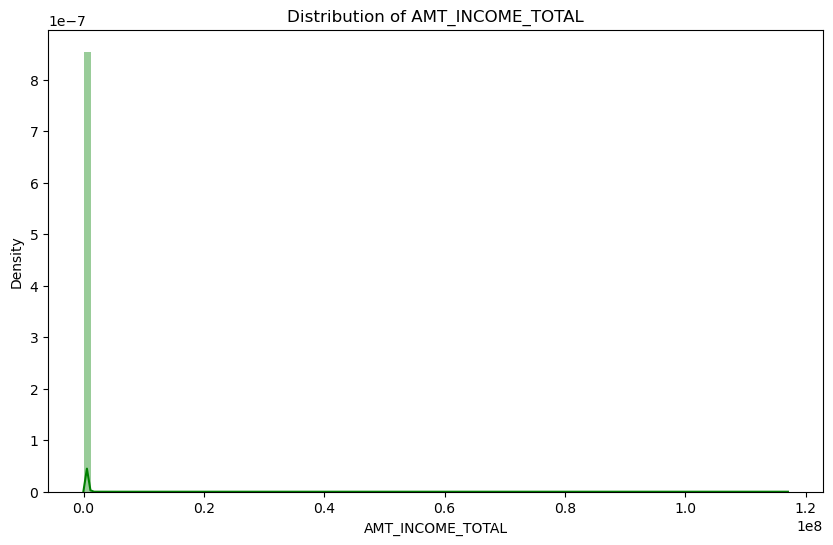

In [19]:
plot_distribution('AMT_INCOME_TOTAL','green')

    Nilai pendapatan sangat tinggi untuk beberapa observasi, itulah sebabnya grafik terlihat seperti ini. Karena kami sedang melakukan deteksi anomali, kami tidak akan menghapusnya.

#### Jumlah Credit / Pinjaman
    Jumlah kredit yang diminta oleh Peminjam.

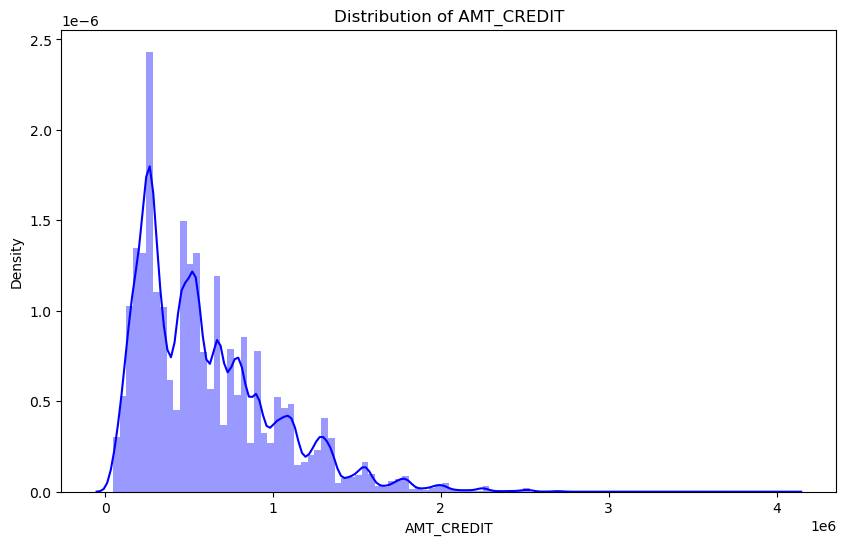

In [20]:
plot_distribution('AMT_CREDIT','blue')

#### Jumlah Angsuran
    Jumlah angsuran bulanan yang harus dibayarkan oleh Peminjam.

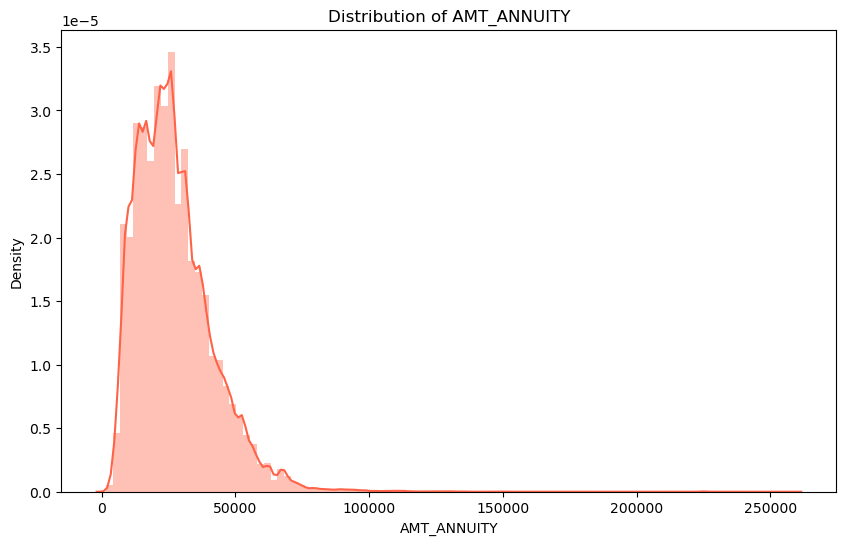

In [21]:
plot_distribution('AMT_ANNUITY','tomato')

#### Days from birth distribution
    Mengacu pada seberapa lama sejak seseorang dilahirkan.  Nilainya negatif itu berarti tanggal lahir individu tersebut berada di masa lalu.

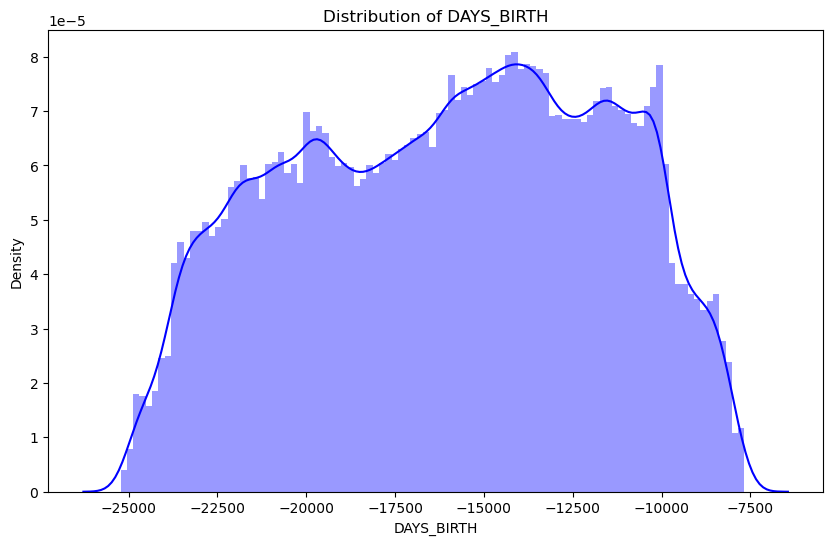

In [22]:
plot_distribution('DAYS_BIRTH','blue')

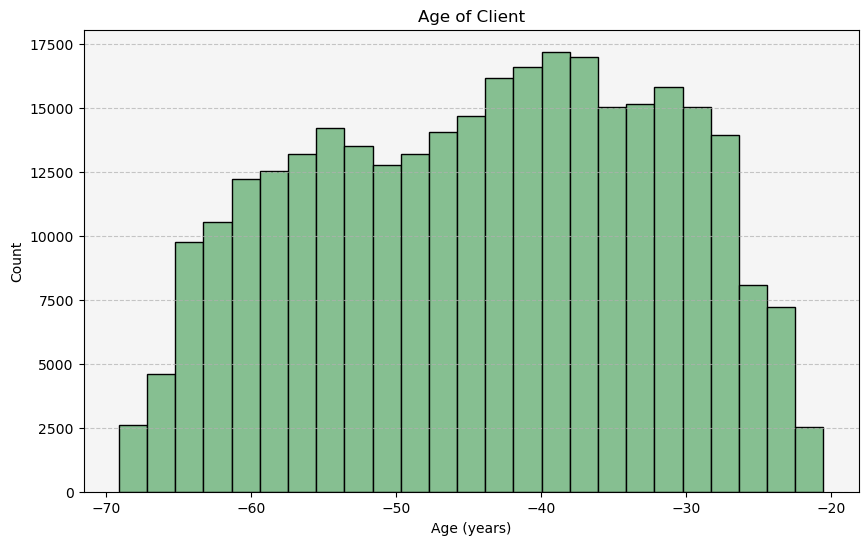

In [23]:
plt.figure(figsize=(10, 6))

# Tambahkan warna dan pemformatan tepi
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor='black', bins=25, color='#86bf91')

# Tambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

# Atur warna latar belakang
plt.gca().set_facecolor('#F5F5F5')

plt.show()


    Dari data diatas dapat disimpulkan Rentang usia Client antara sekitar 20 dan 68 tahun

    Mari visualisasikan pengaruh usia terhadap target dengan membuat plot Kernel Density Estimation  (KDE) yang diwarnai berdasarkan nilai target.

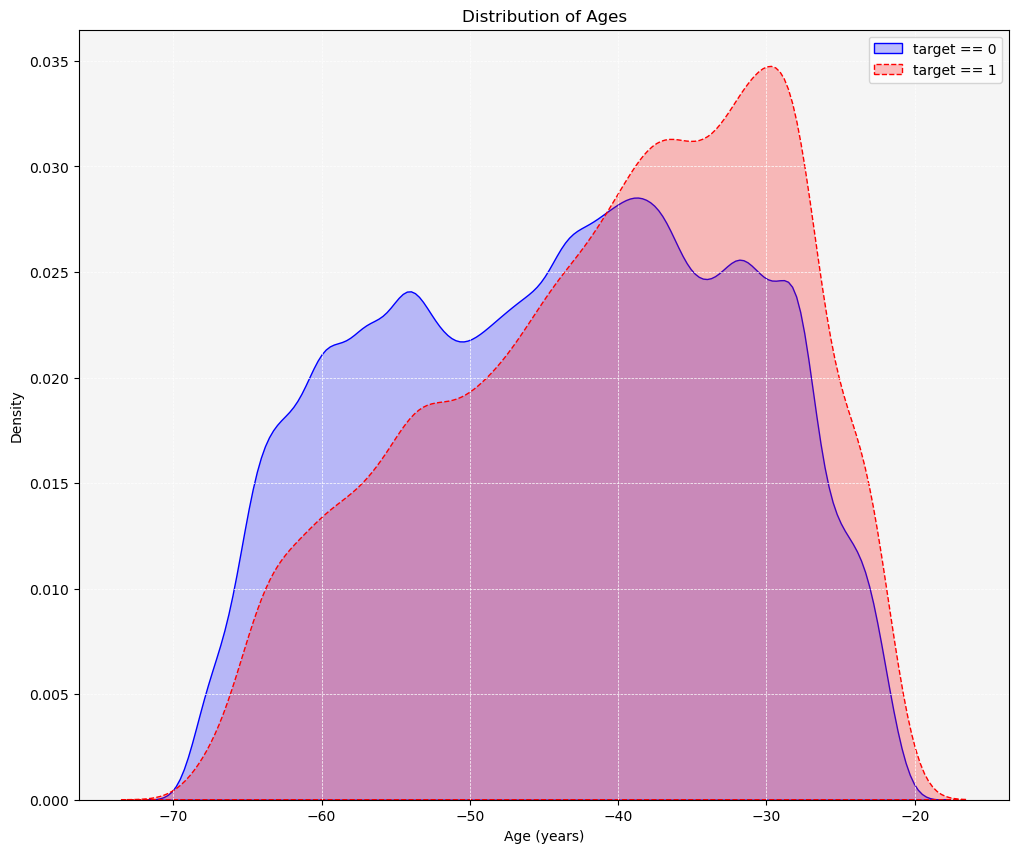

In [64]:
plt.figure(figsize=(12, 10))
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target == 0', color='blue', linestyle='-', fill=True)
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target == 1', color='red', linestyle='--', fill=True)


# Tambahkan label dan judul
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.legend(); plt.title('Distribution of Ages')

# Atur warna latar belakang dan grid
plt.gca().set_facecolor('#F5F5F5')
plt.grid(color='white', linestyle='--', linewidth=0.5)

# Tampilkan plot
plt.show()

    Grafik target == 1 cenderung condong ke ujung yang lebih muda dari rentang usia. Meskipun ini tidak menunjukkan korelasi yang signifikan (koefisien korelasi -0,07), variabel ini kemungkinan akan bermanfaat dalam model machine learning karena memengaruhi target.

    Dengan demikian, ada tren yang terjadi adalah peminjam yang lebih muda lebih mungkin tidak melunasi pinjaman! Ini adalah informasi yang dapat langsung digunakan oleh bank
    
    karena klien yang lebih muda kurang cenderung melunasi pinjaman, mungkin sebaiknya mereka diberikan panduan atau tips perencanaan keuangan lebih lanjut. 
    
    Ini bukan berarti bank harus mendiskriminasi pelanggan yang lebih muda, tetapi bijaksana untuk mengambil tindakan pencegahan guna membantu pelanggan yang lebih muda membayar tepat waktu.

#### Exterior Sources
    Variabel EXT_SOURCE_1, EXT_SOURCE_2, dan EXT_SOURCE_3 memiliki hubungan negatif yang kuat dengan variabel target. Menurut dokumentasi, ketiga fitur ini menggambarkan "skor yang dinormalisasi dari sumber data eksternal." Artinya, semakin tinggi nilai-nilai skor eksternal ini, semakin tinggi kemungkinan pinjaman akan dilunasi. Skor ini mungkin mencerminkan informasi seperti sejarah kredit atau perilaku pembayaran, dan nilai yang tinggi dapat diartikan sebagai indikator kelayakan kredit yang baik.

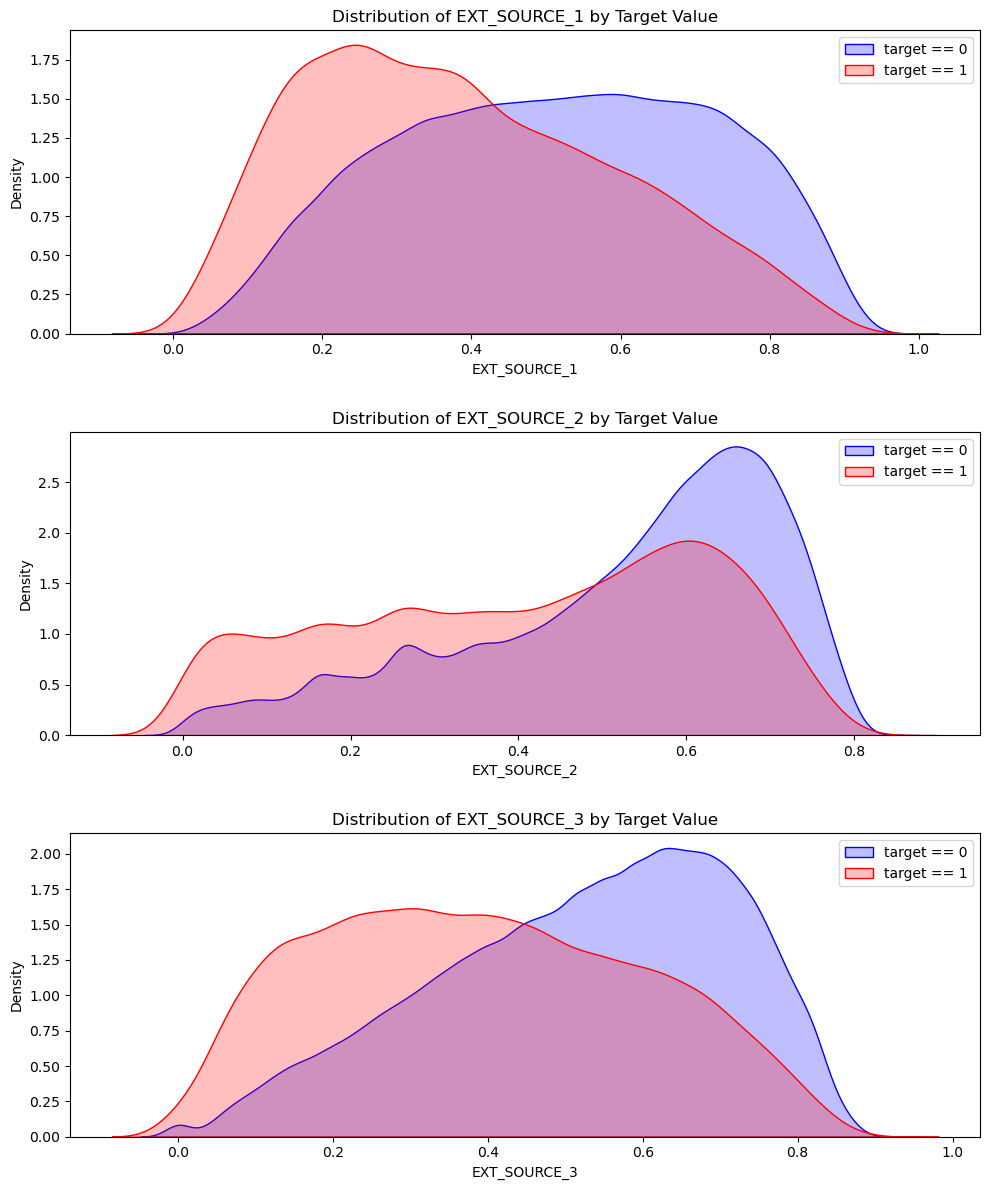

In [25]:
plt.figure(figsize=(10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # Create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    
    # Plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label='target == 0', fill=True, color='blue')
    
    # Plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label='target == 1', fill=True, color='red')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    
    # Add legend
    plt.legend()

# Adjust layout
plt.tight_layout(h_pad=2.5)
plt.show()


    EXT_SOURCE_3 menunjukkan perbedaan terbesar antara nilai-nilai target. Kita dapat dengan jelas melihat bahwa fitur ini memiliki hubungan dengan kemungkinan seorang pelamar melunasi pinjaman.

    Mari juga lihat korelasi antara fitur-fitur EXT_SOURCE dengan target dan satu sama lain.

In [26]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


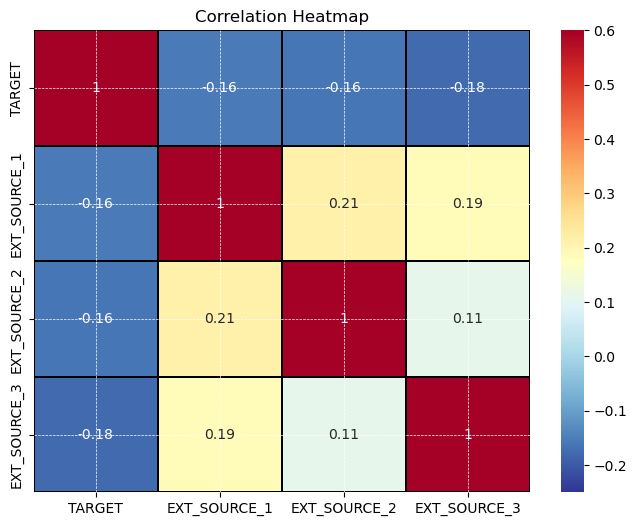

In [27]:
plt.figure(figsize=(8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6, linewidths=0.1, linecolor='black')

# Atur warna latar belakang dan grid
plt.gca().set_facecolor('#F5F5F5')
plt.grid(color='white', linestyle='--', linewidth=0.5)

plt.title('Correlation Heatmap')
plt.show()


    Semua tiga fitur EXT_SOURCE memiliki korelasi negatif dengan target, menunjukkan bahwa ketika nilai EXT_SOURCE meningkat, klien lebih mungkin melunasi pinjaman.

#### Drop Column

In [28]:
correlations = application_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.15

In [29]:
corr_matrix = application_train.corr().abs()
corr_matrix.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.002108,0.001129,0.001820,0.000343,0.000433,0.000232,0.000849,0.001500,0.001366,0.000973,0.000384,0.001818,0.002804,0.001337,0.000415,0.002815,0.002753,0.000281,0.002895,0.001075,0.001138,0.000350,0.000283,0.001097,0.002903,0.001885,0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,0.002070,0.001551,0.005900,0.001463,0.004862,0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,0.002575,0.003042,0.001961,0.001411,0.001890,0.005245,0.001058,0.005017,0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,0.001923,0.001920,0.001988,0.001647,0.001366,0.005777,0.001036,0.005067,0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,0.003020,0.002440,0.002288,0.001409,0.000082,0.001423,0.001187,0.000858,0.000700,0.003411,0.004139,0.001097,0.002121,0.002694,0.001809,0.001505,0.000815,0.002012,0.001045,0.000896,0.001077,0.002604,0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,0.002672,0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,0.002108,1.000000,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,0.023806,0.001758,0.009308,0.058899,0.060893,0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.155317,0.160472,0.178919,0.029498,0.022746,0.009728,0.022149,0.018550,0.034199,0.019172,0.044003,0.033614,0.010885,0.025031,0.032997,0.003176,0.013578,0.027284,0.019952,0.009036,0.022068,0.016340,0.032131,0.017387,0.043226,0.032698,0.010174,0.023393,0.030685,0.001557,0.012711,0.029184,0.022081,0.009993,0.022326,0.018573,0.033863,0.019025,0.043768,0.033394,0.011256,0.024621,0.032739,0.002757,0.013337,0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,0.002672,0.000316,0.028602,0.001520,0.008040,0.004352,0.001414,0.004229,0.000756,0.011583,0.009464,0.006536,0.011615,0.003378,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,0.183395,0.028019,0.008494,0.001041,0.240714,0.055630

In [30]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()
# Threshold for removing
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 35 columns to remove.


In [31]:
to_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [32]:
print('Training shape: ', application_train.shape)
application_train = application_train.drop(columns = to_drop)
print('New Training shape: ', application_train.shape)

Training shape:  (307511, 122)
New Training shape:  (307511, 87)


#### missing_values
    Melihat banyak data yang memiliki nilai "Null"/"Nan"/kosong

In [33]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '%'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '%', ascending=False).round(1)
        
        # Print some summary information
        print ("Dataframe yang Anda pilih memiliki " + str(df.shape[1]) + " kolom.\n"      
            "dimana diantaranya terdapat " + str(mis_val_table_ren_columns.shape[0]) +
              " kolom yang memiliki 'missing values'.")
        
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [34]:
missing_values = missing_values_table(application_train)
missing_values

Dataframe yang Anda pilih memiliki 87 kolom.
dimana diantaranya terdapat 34 kolom yang memiliki 'missing values'.


,Missing Values,%
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
FLOORSMIN_AVG,208642,67.8
YEARS_BUILD_AVG,204488,66.5
OWN_CAR_AGE,202929,66.0
LANDAREA_AVG,182590,59.4
BASEMENTAREA_AVG,179943,58.5
EXT_SOURCE_1,173378,56.4
NONLIVINGAREA_AVG,169682,55.2


In [35]:
application_train.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [36]:
categorical_vars = [var for var in application_train.columns if application_train[var].isnull().mean()>0 and
                   application_train[var].dtypes=='O']
categorical_vars

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [37]:
numeric_vars=missing_values.index.tolist()
numeric_vars = [e for e in numeric_vars if e not in categorical_vars]
numeric_vars

['COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_AVG',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')


application_train[numeric_vars] = imputer.fit_transform(application_train[numeric_vars])


In [39]:
print(application_train['NAME_TYPE_SUITE'].mode())

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object


In [40]:
application_train['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)

In [41]:
print(application_train['OCCUPATION_TYPE'].mode())

0    Laborers
Name: OCCUPATION_TYPE, dtype: object


In [42]:
application_train['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)

In [43]:
print(application_train['FONDKAPREMONT_MODE'].mode())

0    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object


In [44]:
application_train['FONDKAPREMONT_MODE'].fillna('reg oper account',inplace=True)

In [45]:
print(application_train['HOUSETYPE_MODE'].mode())

0    block of flats
Name: HOUSETYPE_MODE, dtype: object


In [46]:
application_train['HOUSETYPE_MODE'].fillna('block of flats',inplace=True)

In [47]:
print(application_train['WALLSMATERIAL_MODE'].mode())

0    Panel
Name: WALLSMATERIAL_MODE, dtype: object


In [48]:
application_train['WALLSMATERIAL_MODE'].fillna('Panel',inplace=True)

In [49]:
print(application_train['EMERGENCYSTATE_MODE'].mode()) 

0    No
Name: EMERGENCYSTATE_MODE, dtype: object


In [50]:
application_train['EMERGENCYSTATE_MODE'].fillna('No',inplace=True)

In [65]:
application_train.isnull().sum()

SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE           0
FLAG_OWN_CAR                 0
FLAG_OWN_REALTY              0
                            ..
WALLSMATERIAL_MODE_Wooden    0
CREDIT_INCOME_PERCENT        0
ANNUITY_INCOME_PERCENT       0
CREDIT_TERM                  0
DAYS_EMPLOYED_PERCENT        0
Length: 211, dtype: int64

In [52]:
application_train.shape

(307511, 87)

#### Encoding


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

for col in application_train:
    if application_train[col].dtype == 'object':
        if len(list(application_train[col].unique())) <= 2:
            le.fit(application_train[col])
            application_train[col] = le.transform(application_train[col])
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


In [56]:
application_train = pd.get_dummies(application_train)

print('Features shape: ', application_train.shape)

Features shape:  (307511, 207)


    CREDIT_INCOME_PERCENT: Persentase jumlah kredit relatif terhadap pendapatan klien.
    
    ANNUITY_INCOME_PERCENT: Persentase anuitas pinjaman relatif terhadap pendapatan klien.
    
    CREDIT_TERM: Panjang pembayaran dalam bulan (karena anuitas adalah jumlah bulanan yang harus dibayar).
    
    DAYS_EMPLOYED_PERCENT: Persentase jumlah hari bekerja relatif terhadap usia klien.

In [57]:
application_train['CREDIT_INCOME_PERCENT'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_train['ANNUITY_INCOME_PERCENT'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_TERM'] = application_train['AMT_ANNUITY'] / application_train['AMT_CREDIT']
application_train['DAYS_EMPLOYED_PERCENT'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']

In [59]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: ty

#### Save Clean Data

In [58]:
application_train.to_csv('cleandata.csv', index=False)